# Newton-Raphson method for Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate synthetic data

In [2]:
# Define the number of datapoints per blob
num_blob_1 = 50
num_blob_2 = 50

# Define the mean of the datapoints
muy_1 = [0, 0]
muy_2 = [5, 0]

# Define the covariance matrices
cov = np.array([
    [1, 0],
    [0, 1]
])

# Generate the datapoints
np.random.seed(80)
blob_1 = np.random.multivariate_normal(mean=muy_1, cov=cov, size=num_blob_1)
blob_2 = np.random.multivariate_normal(mean=muy_2, cov=cov, size=num_blob_2)

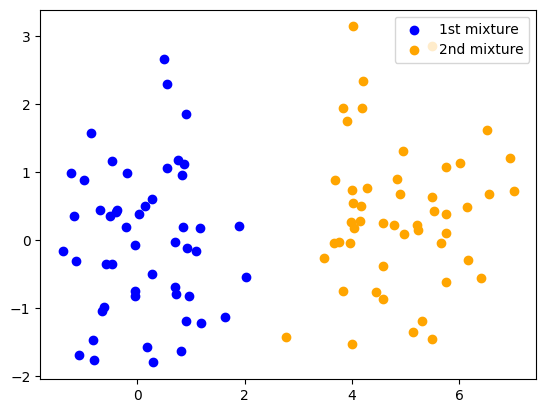

In [3]:
# Display the datapoints
plt.scatter(blob_1[:, 0], blob_1[:, 1], color='blue', label='1st mixture')
plt.scatter(blob_2[:, 0], blob_2[:, 1], color='orange', label='2nd mixture')
plt.legend()
plt.show()

In [4]:
# Add x_0
x_1 = np.hstack((np.ones(blob_1.shape[0]).reshape(-1, 1), blob_1))
x_2 = np.hstack((np.ones(blob_2.shape[0]).reshape(-1, 1), blob_2))

# Merge the dataset
X = np.vstack((x_1, x_2))
t = np.array([1] * num_blob_1 + [0] * num_blob_2)

## Newton-Raphson method for Logistic Regression

In [10]:
def calculate_prediction(X, w):
    """
    Calculate y_n
    :param X: the train features
    :param w: the train labels
    :return: the value of the prediction
    """
    z = np.dot(X, w)
    y = 1 / (1 + np.exp(-z))
    return y

def calculate_cost(X, t, w):
    """
    Calculate the cost function
    :param X: the train features
    :param t: the train labels
    :param w: the parameters
    :return: the value of the cost function
    """
    y = calculate_prediction(X, w)
    costs = t * np.log(y) + (1 - t) * np.log(1 - y)
    return - (1 / X.shape[0]) * np.sum(costs)

def find_w(X_train, t_train, learning_rate=0.01, epochs=10):
    """
    Find the parameters w and the train costs
    :param X_train: the train features
    :param t_train: the train labels
    :param learning_rate: learning rate
    :param epochs: the number of epochs
    :return: w, cost
    """
    # Get the dimension
    N = X_train.shape[1]
    
    # Initialize the parameter
    w = np.random.normal(size=N)
    
    # Starting the training loop
    costs = []
    for epoch in range(epochs):
        # Calculate predictions
        y = calculate_prediction(X, w)
        
        # Calculate R matrix
        r = np.diag(y * (1 - y))
        
        # Calculate z
        z = X @ w - np.linalg.solve(r, y - t)
        
        # Update w
        w = np.linalg.solve(X.T @ r @ X, X.T @ r @ z)
            
        # Calculate cost
        cost = calculate_cost(X_train, t_train, w)
        costs.append(cost)
        print(f"EPOCH {epoch} - Cost {cost}")
        
    return w, costs

In [30]:
# Calculate w
epochs = 5
w, costs = find_w(X, t, learning_rate=0.01, epochs=epochs)

EPOCH 0 - Cost 0.1472501856820839
EPOCH 1 - Cost 0.06677464544379504
EPOCH 2 - Cost 0.032265769462246977
EPOCH 3 - Cost 0.016518326994435492
EPOCH 4 - Cost 0.008624929372381213


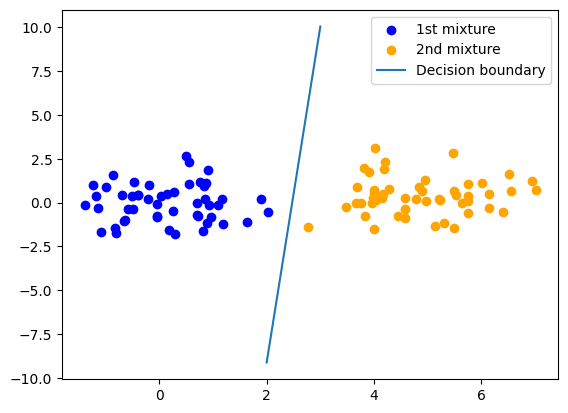

In [33]:
# The w parameters
w_0, w_1, w_2 = w[0], w[1], w[2]

# Calculate starting and ending points
x_1 = 2
y_1 = (-w_0 - w_1 * x_1) / w_2
x_2 = 3
y_2 = (-w_0 - w_1 * x_2) / w_2

# Draw the boundary
plt.scatter(blob_1[:, 0], blob_1[:, 1], color='blue', label='1st mixture')
plt.scatter(blob_2[:, 0], blob_2[:, 1], color='orange', label='2nd mixture')
plt.plot([x_1, x_2], [y_1, y_2], label='Decision boundary')
plt.legend()
plt.savefig("figures/line.png")
plt.show()

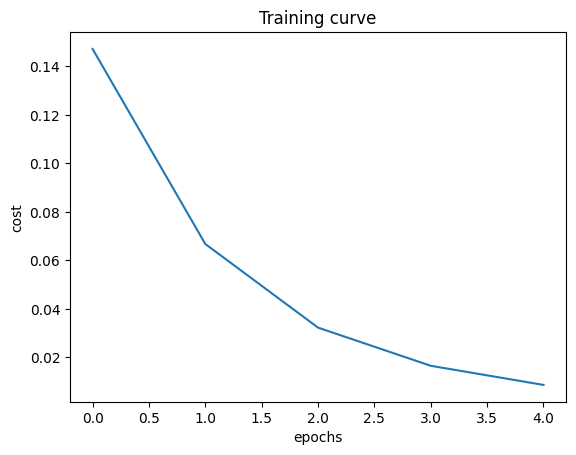

In [34]:
# Draw the error function
plt.plot(np.arange(5), costs)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("Training curve")
plt.savefig("figures/error.png")
plt.show()